In [193]:
# import and install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.reshape.tile import to_datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pickle
from pickle import dump, load
import sys


## Data Preparation and Preprocessing

In [138]:
# Reading data into DataFrame
cab_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataGlaciers/Cab_Data.csv')
city = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataGlaciers/City.csv')
customer_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataGlaciers/Customer_ID.csv')
transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataGlaciers/Transaction_ID.csv')
holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataGlaciers/holidays.csv')

# Set the display option to show two decimal places for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

In [139]:
# Merge the DataFrames using pandas
df = pd.merge(cab_data, transaction, on= 'Transaction ID')
df = pd.merge(df, customer_id, on='Customer ID')
# Convert Date of Trave to datetime format
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

holidays['date'] = pd.to_datetime(holidays['date'])

# Merge DataFrames based on 'Date' column
df = pd.merge(df, holidays, left_on='Date of Travel', right_on='date', how='left')

# Create 'Is Holiday' column and mark 'Yes' where there is a match
df['Is Holiday'] = df['date'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

# Drop unnecessary columns
df = df.drop(['date', 'holiday'], axis=1)

# Convert Transaction ID column to string format
df['Transaction ID'] = df['Transaction ID'].astype(str)

# Convert Year column to string format
df['Year'] = df['Year'].astype(str)

# Convert Customer IDcolumn to string format
df['Customer ID'] = df['Customer ID'].astype(str)

# Define age group bins and labels
bins = [25, 35, 45, 55, 65, 75, 85]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Create a new column 'Age group'
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Define Income Range bins and labels
bins = [5000, 10000, 20000, 30000, 40000, 50000]
labels = ['2-5k', '6-10k', '11-20k', '21-30k', '31-40k']

# Create a new column 'Income Range'
df['Income Range'] = pd.cut(df['Income (USD/Month)'], bins=bins, labels=labels, include_lowest=True)


# Profit made on each trip
df['Profit'] = df['Price Charged']-df['Cost of Trip']

# Extract Month
df['Month'] = df['Date of Travel'].dt.month_name()

# Extract Day
df['Day'] = df['Date of Travel'].dt.day

# Extract Day of the Week
df['Day_of_Week'] = df['Date of Travel'].dt.day_name()

# Convert Day column to string format
df['Day'] = df['Day'].astype(str)

df = df.sort_values('Date of Travel', ascending=True)

# Calculate profit per kilometer
df['Profit per KM'] = df['Profit'] / df['KM Travelled']


In [140]:
#Filtering out less importantant columns
df = df[[
        'Transaction ID', 'Date of Travel', 'Company','City','Customer ID', 'Payment_Mode',
         'Gender', 'Age Group', 'Income Range', 'Is Holiday', 'MonthYear', 'Year',
         'Month','Day', 'Day_of_Week','KM Travelled', 'Price Charged',
         'Cost of Trip', 'Profit', 'Profit per KM'
         ]]

# Calculate the average cost of trip per kilometer
pink_cost_per_KM = (df[df['Company'] == 'Pink Cab']['Cost of Trip'] / df[df['Company'] == 'Pink Cab']['KM Travelled']).mean()
yellow_cost_per_KM = (df[df['Company'] == 'Yellow Cab']['Cost of Trip'] / df[df['Company'] == 'Yellow Cab']['KM Travelled']).mean()

# Calculate the price charged per kilometer
pink_price_per_KM = (df[df['Company'] == 'Pink Cab']['Price Charged'] / df[df['Company'] == 'Pink Cab']['KM Travelled']).mean()
yellow_price_per_KM = (df[df['Company'] == 'Yellow Cab']['Price Charged'] / df[df['Company'] == 'Yellow Cab']['KM Travelled']).mean()



# Calculate the average profit per kilometer
pink_cab_average = df[df['Company'] == 'Pink Cab']['Profit per KM'].mean()
yellow_cab_average = df[df['Company'] == 'Yellow Cab']['Profit per KM'].mean()
overall_profit_average = df['Profit per KM'].mean()

# Calculate total distance travelled
pink_total_km = df[df['Company']=='Pink Cab']['KM Travelled'].sum()
yellow_total_km = df[df['Company']=='Yellow Cab']['KM Travelled'].sum()
total_km = df['KM Travelled'].sum()

# Calculate average KM travelled
pink_average_km = df[df['Company']=='Pink Cab']['KM Travelled'].mean()
yellow_average_km = df[df['Company']=='Yellow Cab']['KM Travelled'].mean()
overall_km_average = df['KM Travelled'].mean()



## Exploratory Data Analysis

<ipython-input-141-01b98ba11be0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

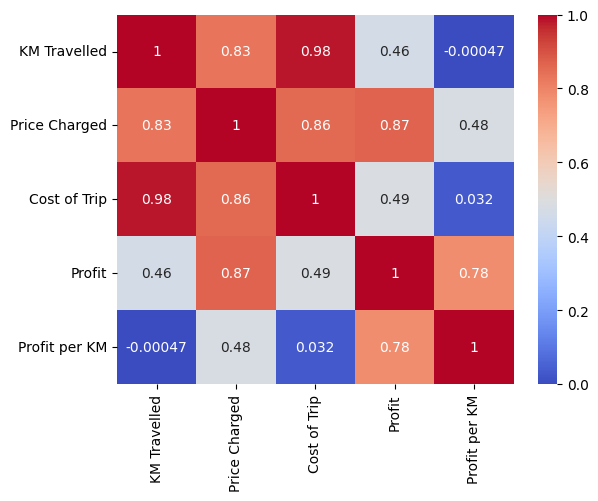

In [141]:
# Correlation Matrix
correlation = df.corr()

# Heatmap to determine degree of correlation between variables
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

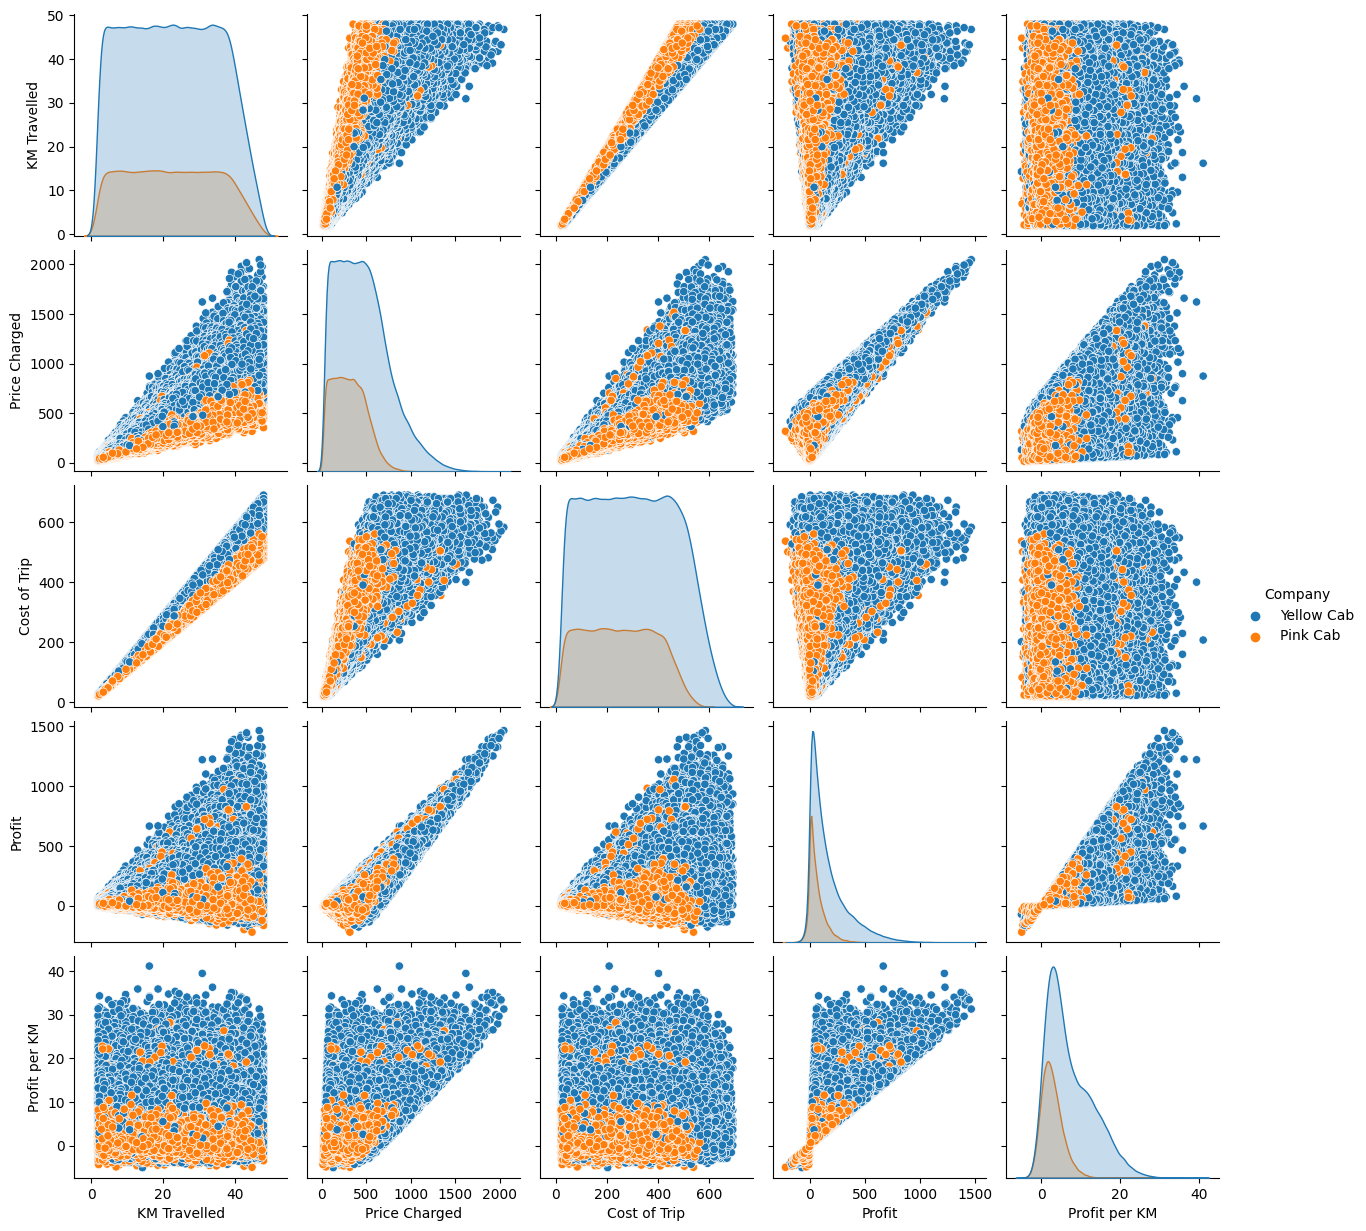

In [142]:
# Pair plot to determing relationship between variables
sns.pairplot(df, hue = 'Company')

## Data Analysis and Visualization

<Axes: xlabel='City', ylabel='KM Travelled'>

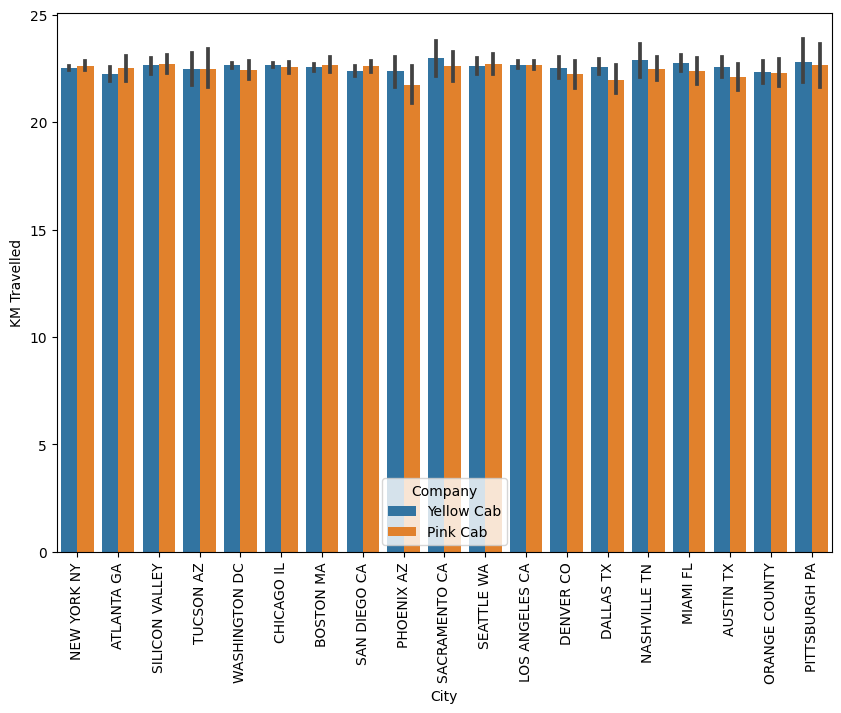

In [143]:
# Bar chart for KM by Company and City
plt.figure(figsize=(10,7))
# Rotate x-axis labels
plt.xticks(rotation=90)
sns.barplot(x='City', y= 'KM Travelled', hue='Company', data= df)

<Axes: xlabel='City', ylabel='Profit'>

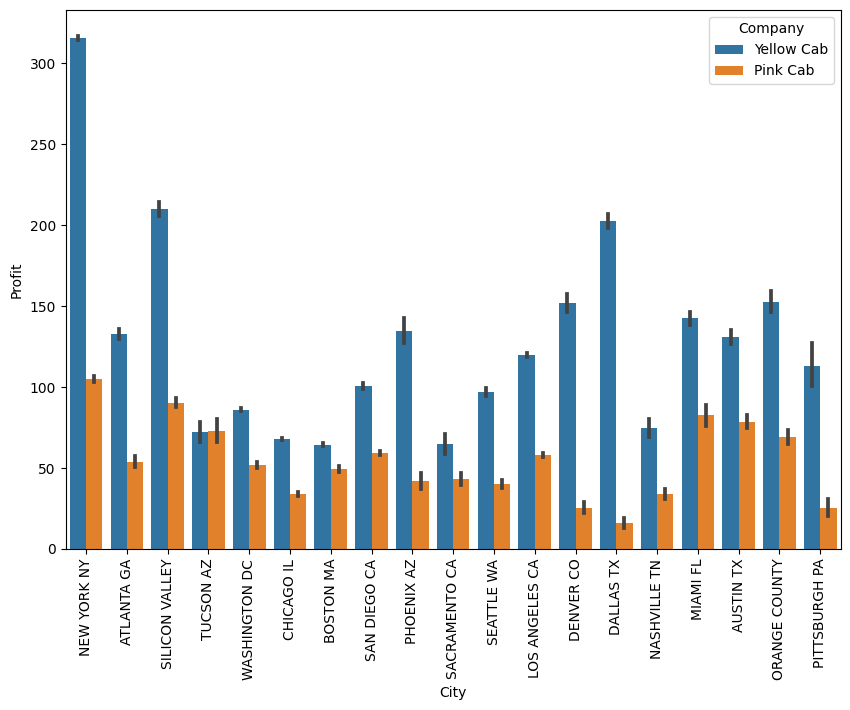

In [144]:
# Bar chart for profit made by Company and City
plt.figure(figsize=(10,7))
# Rotate x-axis labels
plt.xticks(rotation=90)
sns.barplot(x='City', y= 'Profit', hue='Company', data= df)

<Axes: xlabel='Year', ylabel='KM Travelled'>

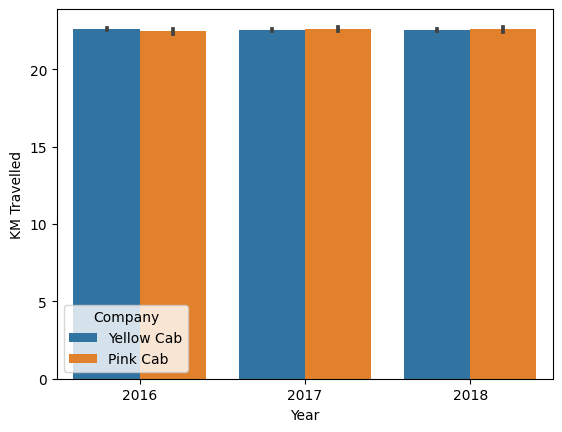

In [145]:
# Bar plot for Profit by Year and Company
sns.barplot(x='Year', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Year', ylabel='Profit'>

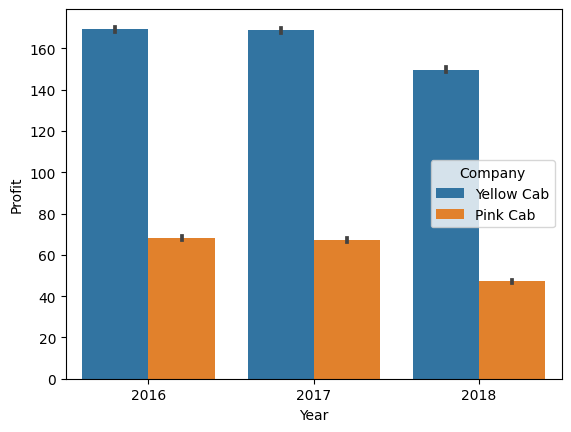

In [146]:
# Bar plot for yearly profit by company
sns.barplot(x='Year', y='Profit', hue='Company', data=df)

<Axes: xlabel='Income Range', ylabel='KM Travelled'>

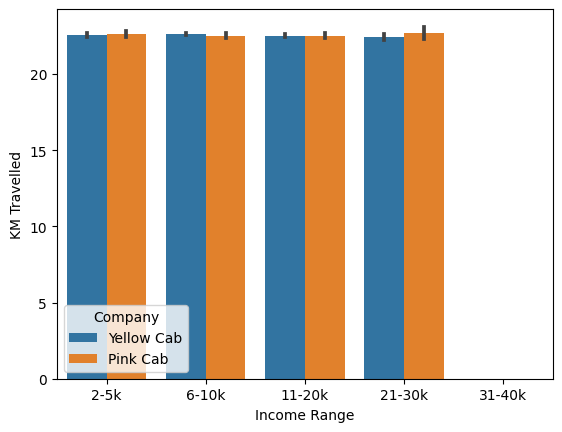

In [147]:
# Bar plot for distance treavelled yearly by Income Range
sns.barplot(x='Income Range', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Income Range', ylabel='Profit'>

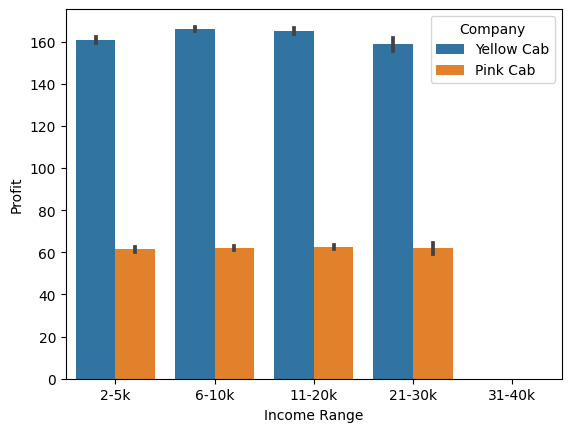

In [148]:
# Bar plot for yearly profit by Income Range
sns.barplot(x='Income Range', y='Profit', hue='Company', data=df)

<Axes: xlabel='Gender', ylabel='KM Travelled'>

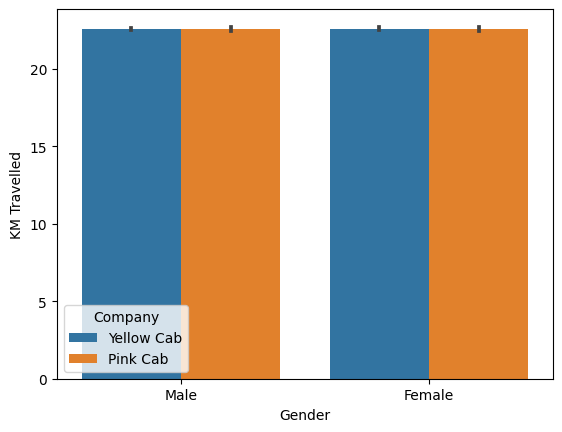

In [149]:
# Bar plot for distance travelled yearly by Gender
sns.barplot(x='Gender', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Gender', ylabel='Profit'>

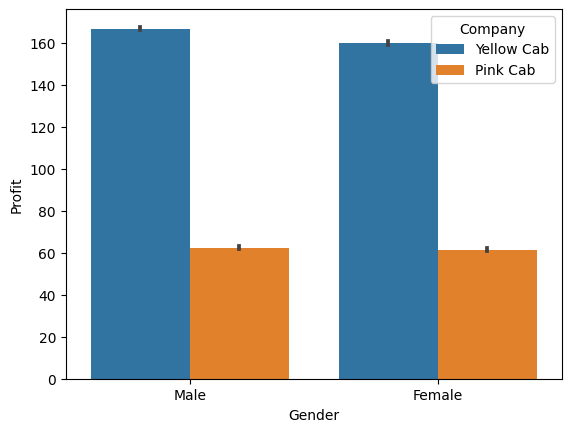

In [150]:
# Bar plot for yearly profit by Gender
sns.barplot(x='Gender', y='Profit', hue='Company', data=df)

<Axes: xlabel='Age Group', ylabel='KM Travelled'>

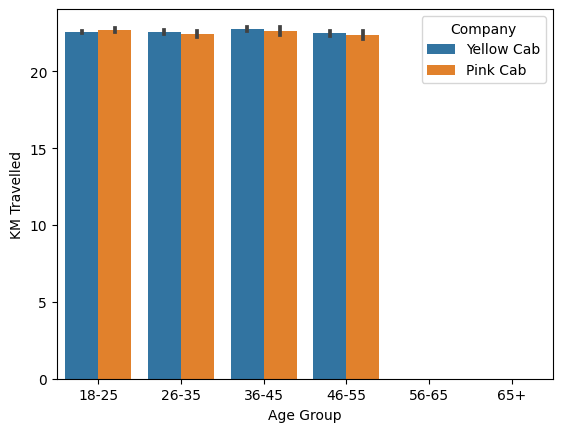

In [151]:
# Bar plot for distance travelled by Age Group
sns.barplot(x='Age Group', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Age Group', ylabel='Profit'>

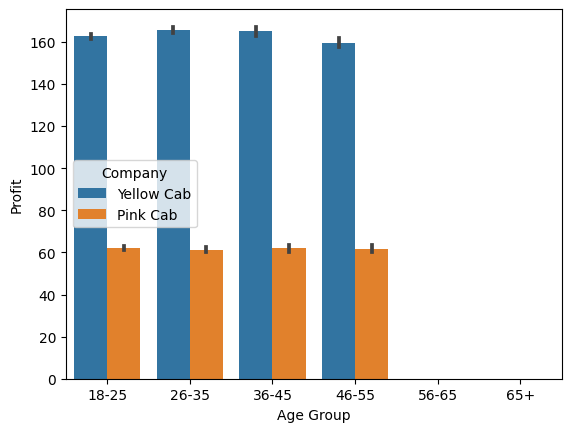

In [152]:
# Bar plot for profit made by Age Group
sns.barplot(x='Age Group', y='Profit', hue='Company', data=df)

<Axes: xlabel='Payment_Mode', ylabel='KM Travelled'>

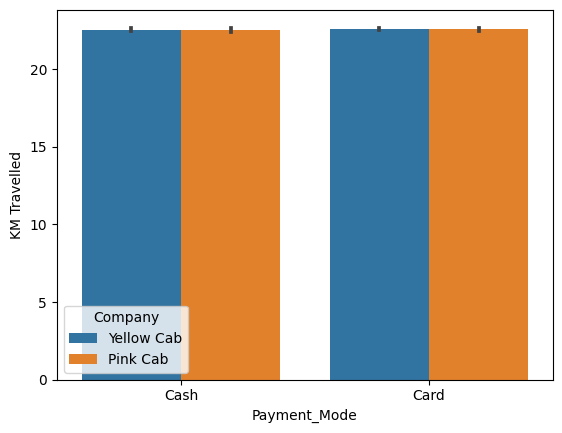

In [153]:
# Bar plot for distance travelled by Payment Method
sns.barplot(x='Payment_Mode', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Payment_Mode', ylabel='Profit'>

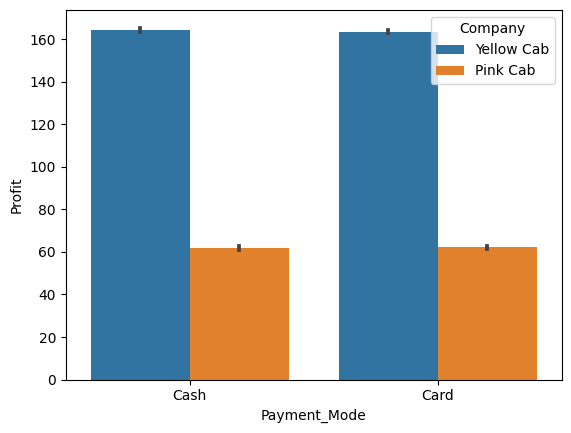

In [154]:
# Bar plot for Profit made by Payment Method
sns.barplot(x='Payment_Mode', y='Profit', hue='Company', data=df)

<Axes: xlabel='Month', ylabel='KM Travelled'>

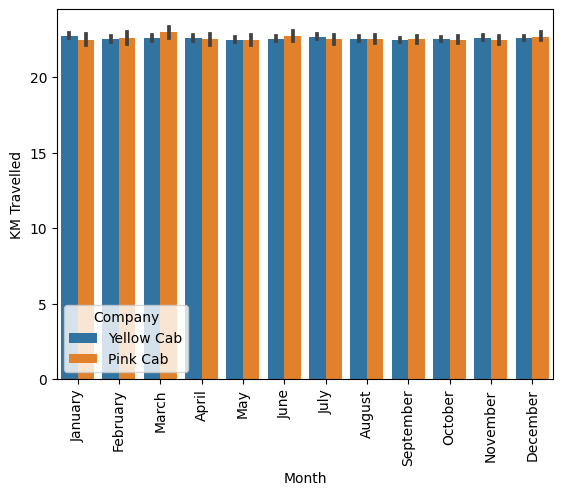

In [155]:
# Bar plot for distance travelled by Month
plt.xticks(rotation=90)
sns.barplot(x='Month', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Month', ylabel='Profit'>

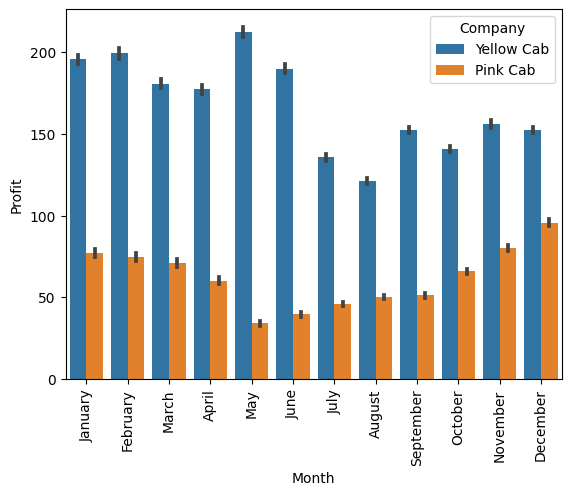

In [156]:
# Bar plot for Profit made by Month
plt.xticks(rotation=90)
sns.barplot(x='Month', y='Profit', hue='Company', data=df)

<Axes: xlabel='Day_of_Week', ylabel='KM Travelled'>

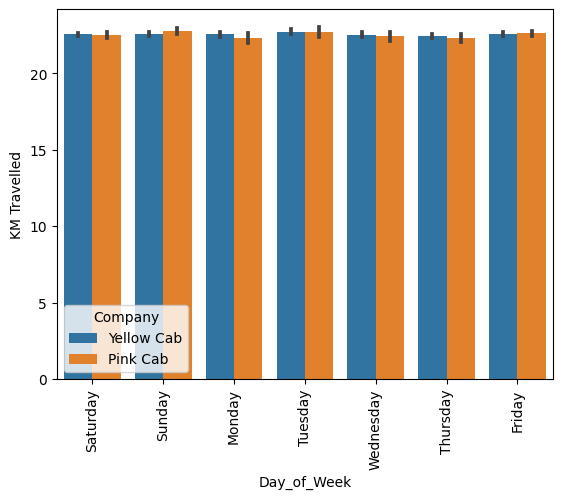

In [157]:
# Bar plot for distance travelled by Day of the week
plt.xticks(rotation=90)
sns.barplot(x='Day_of_Week', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Day_of_Week', ylabel='Profit'>

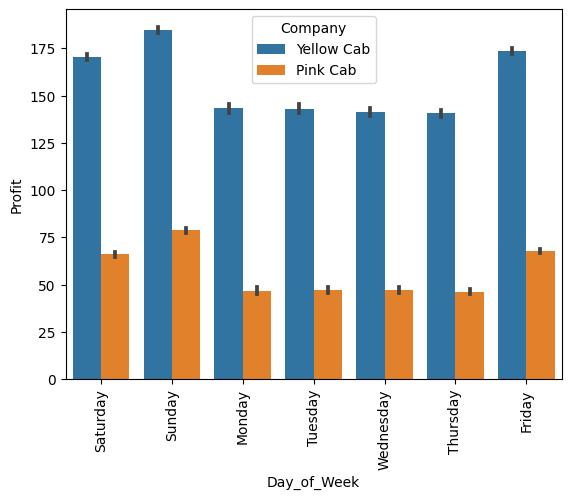

In [158]:
# Bar plot for Profit made by Day of the week
plt.xticks(rotation=90)
sns.barplot(x='Day_of_Week', y='Profit', hue='Company', data=df)

<Axes: xlabel='Is Holiday', ylabel='KM Travelled'>

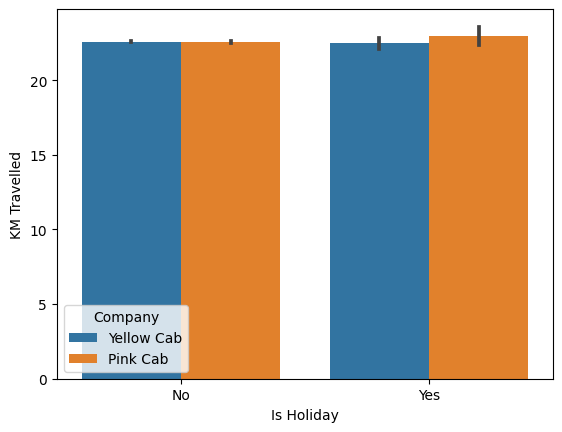

In [159]:
# Bar plot for distance travelled by Holiday
sns.barplot(x='Is Holiday', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Is Holiday', ylabel='Profit'>

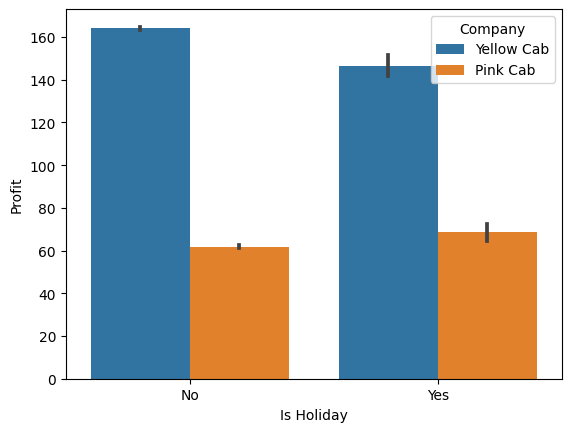

In [160]:
# Bar plot for Profit made by Holiday
sns.barplot(x='Is Holiday', y='Profit', hue='Company', data=df)

<Axes: xlabel='Day', ylabel='KM Travelled'>

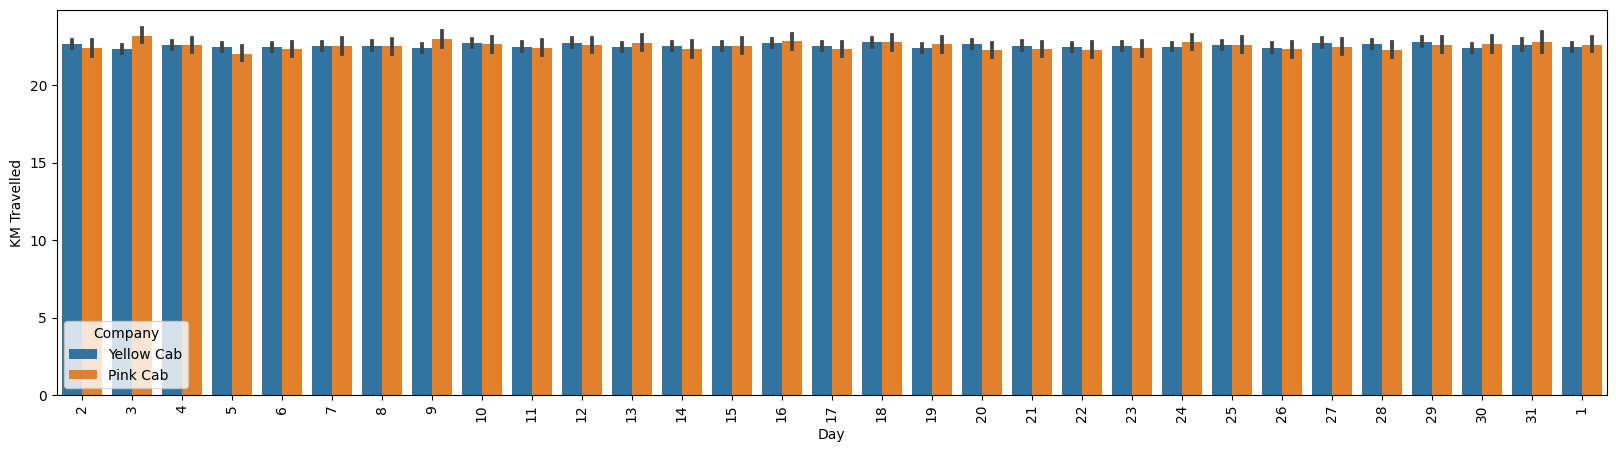

In [161]:
# Bar plot for distance travelled by Date
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='Day', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Day', ylabel='Profit'>

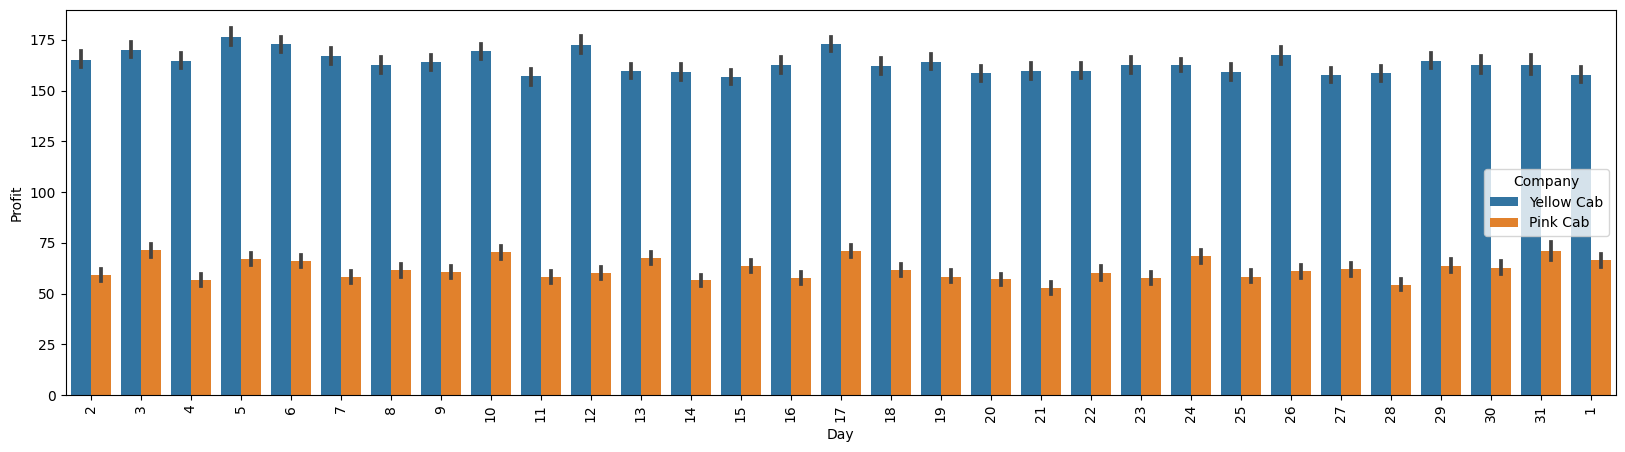

In [162]:
# Bar plot for Profit made by Date
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='Day', y='Profit', hue='Company', data=df)

In [163]:
# Number of transactions by Pink Cab and Yellow Cab
num_pink_tran = len(df[df['Company'] == 'Pink Cab'])
num_yellow_tran = len(df[df['Company'] == 'Yellow Cab'])
total_tran = len(df['Transaction ID'])

# Number of Holidays
pink_hols = len(df[(df['Is Holiday']=='Yes') & (df['Company']== 'Pink Cab')])
yellow_hols = len(df[(df['Is Holiday']=='Yes') & (df['Company']== 'Yellow Cab')])
hols_tran = len((df['Is Holiday']=='Yes'))

# Number of customers
pink_customers = df[df['Company']=='Pink Cab']['Customer ID'].nunique()
yellow_customers = df[df['Company']=='Yellow Cab']['Customer ID'].nunique()
total_customers = df['Customer ID'].nunique()



# Create a new DataFrame
columns = ['Name', 'Pink Cab', 'Yellow Cab', 'Total',]
transactions_customers = pd.DataFrame(columns=columns)

# Append a row for 'Number of Transactions'
transactions_customers = transactions_customers.append({
    'Name': 'Number of Transactions',
    'Pink Cab': num_pink_tran,
    'Yellow Cab': num_yellow_tran,
    'Total': total_tran
}, ignore_index=True)

# Append a row for 'Transactions on Holidays'
transactions_customers = transactions_customers.append({
    'Name': 'Transactions on Holidays',
    'Pink Cab': pink_hols,
    'Yellow Cab': yellow_hols,
    'Total': hols_tran
}, ignore_index=True)

# Append a row for 'Number of Customers'
transactions_customers = transactions_customers.append({
    'Name': 'Number of Customers',
    'Pink Cab': pink_customers,
    'Yellow Cab': yellow_customers,
    'Total': total_customers
}, ignore_index=True)


# Append a row for 'Cost per kilometer'
transactions_customers = transactions_customers.append({
    'Name': 'Cost per KM',
    'Pink Cab': pink_cost_per_KM,
    'Yellow Cab': yellow_cost_per_KM
}, ignore_index=True)

# Append a row for 'price per kilometer'
transactions_customers = transactions_customers.append({
    'Name': 'Price Charged per KM',
    'Pink Cab': pink_price_per_KM,
    'Yellow Cab': yellow_price_per_KM

}, ignore_index=True)
# Append a row for 'Average Profit per KM'
transactions_customers = transactions_customers.append({
    'Name': 'Average Profit per KM',
    'Pink Cab': pink_cab_average,
    'Yellow Cab': yellow_cab_average,
    'Total': overall_profit_average
}, ignore_index=True)

# Append a row for total distance
transactions_customers = transactions_customers.append({
    'Name': 'Total Distance (KM)',
    'Pink Cab': pink_total_km,
    'Yellow Cab': yellow_total_km,
    'Total': total_km
}, ignore_index=True)

# Append a row for 'Average KM'
transactions_customers = transactions_customers.append({
    'Name': 'Average Distance (KM)',
    'Pink Cab': pink_average_km,
    'Yellow Cab': yellow_average_km,
    'Total': overall_km_average
}, ignore_index=True)

# Display the updated DataFrame
transactions_customers


<ipython-input-163-29e827472a16>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transactions_customers = transactions_customers.append({
<ipython-input-163-29e827472a16>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transactions_customers = transactions_customers.append({
<ipython-input-163-29e827472a16>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transactions_customers = transactions_customers.append({
<ipython-input-163-29e827472a16>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transactions_customers = transactions_customers.append({
<ipython-input-163-29e827472a16>:55: FutureWarning: The frame.append method is depre

Name   Pink Cab Yellow Cab      Total
0    Number of Transactions      76255     247155     323410
1  Transactions on Holidays       1529       4490     323410
2       Number of Customers      30865      38486      44888
3               Cost per KM      11.00      13.20        NaN
4      Price Charged per KM      13.74      20.46        NaN
5     Average Profit per KM       2.74       7.26       6.20
6       Total Distance (KM) 1720280.40 5579162.23 7299442.63
7     Average Distance (KM)      22.56      22.57      22.57

<Axes: xlabel='Age Group', ylabel='Count'>

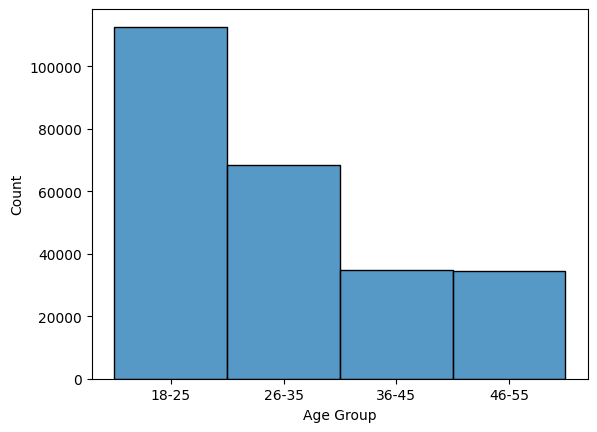

In [164]:
# Age group distribution
sns.histplot(x='Age Group', data=df)

<Axes: xlabel='Month', ylabel='Count'>

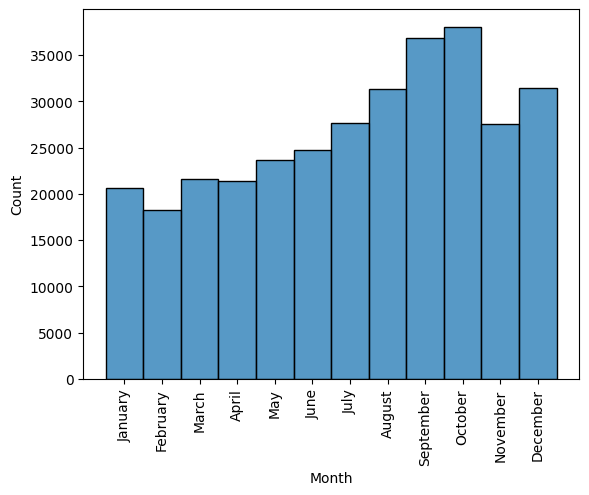

In [165]:
# Month distribution
plt.xticks(rotation=90)
sns.histplot(x='Month',data=df)

<Axes: xlabel='Year', ylabel='Count'>

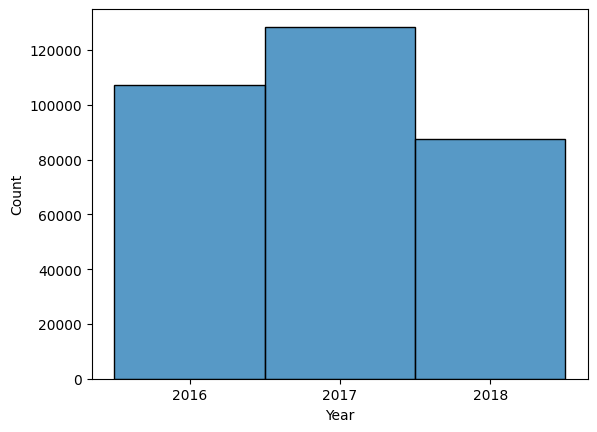

In [166]:
# Year distribution
sns.histplot(x='Year', data=df)

<Axes: xlabel='Day_of_Week', ylabel='Count'>

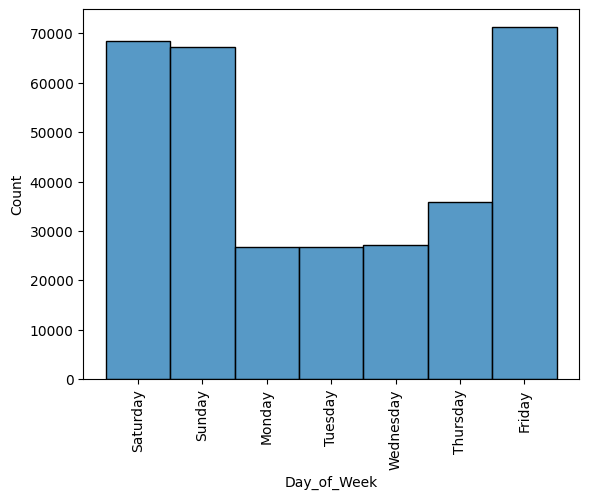

In [167]:
# Days of the week distribution
plt.xticks(rotation=90)
sns.histplot(x='Day_of_Week', data=df)

<Axes: xlabel='Income Range', ylabel='Count'>

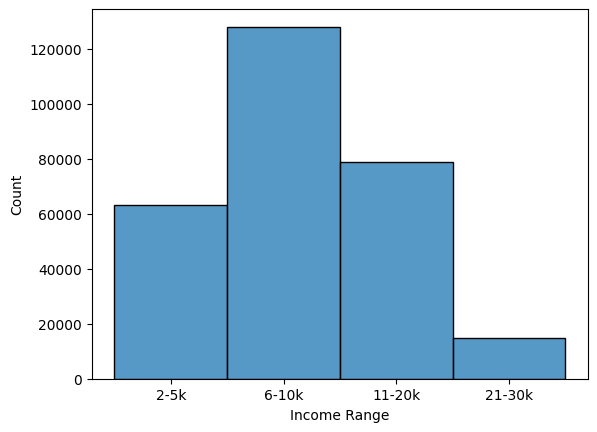

In [168]:
# Income Range distribution
sns.histplot(x='Income Range', data=df)

<Axes: xlabel='MonthYear', ylabel='Cost of Trip'>

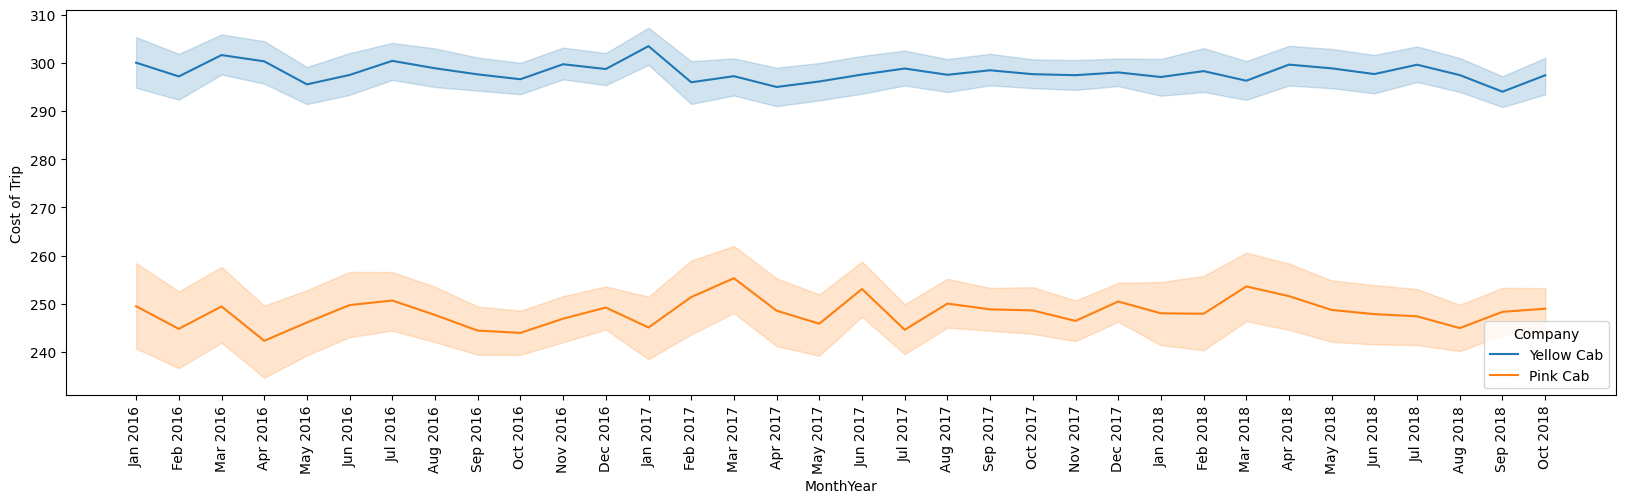

In [169]:
# Line plot for Cost of Trip(MonthYear)

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='MonthYear', y='Cost of Trip', hue='Company', data=df)

<Axes: xlabel='MonthYear', ylabel='Price Charged'>

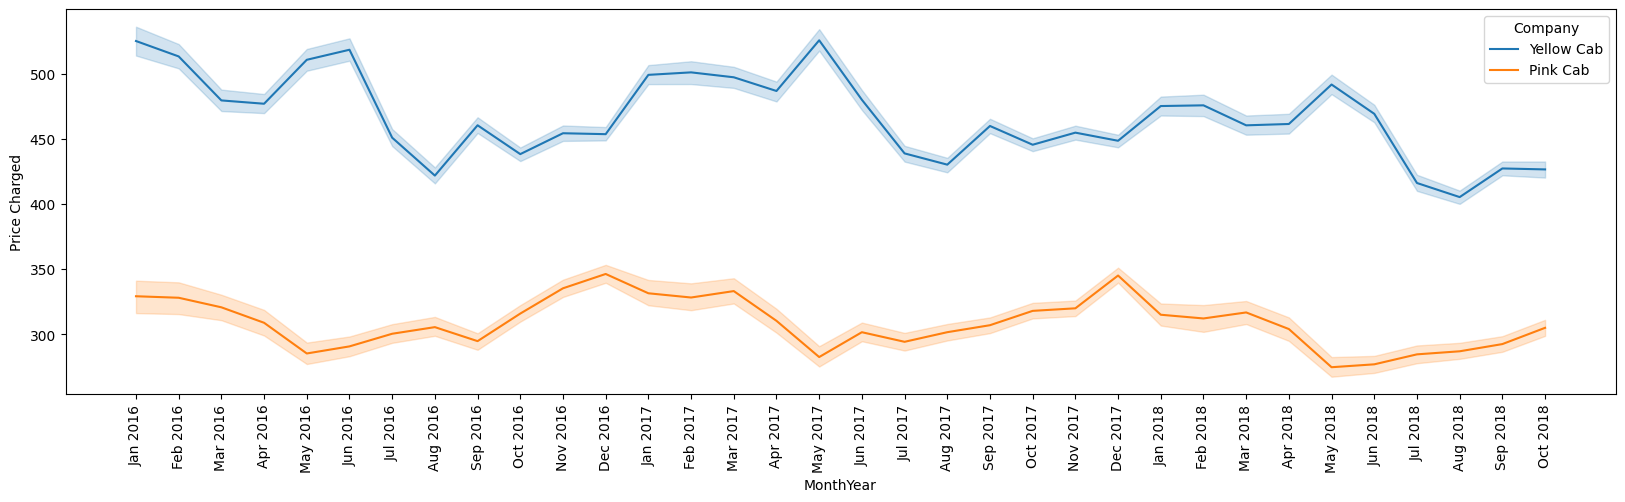

In [170]:
# Line plot for amount charged by company(MonthYear)

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='MonthYear', y='Price Charged', hue='Company', data=df)


<Axes: xlabel='MonthYear', ylabel='KM Travelled'>

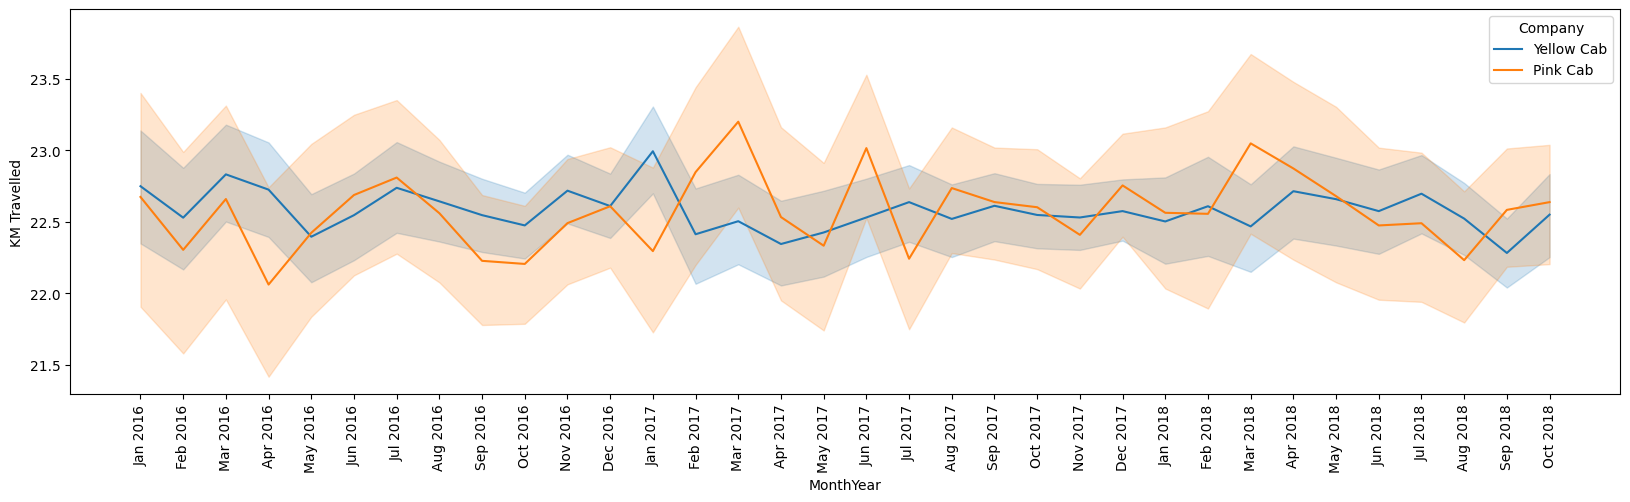

In [171]:
# Line plot for Distance travelled by company(Monthyear)

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='MonthYear', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='MonthYear', ylabel='Profit'>

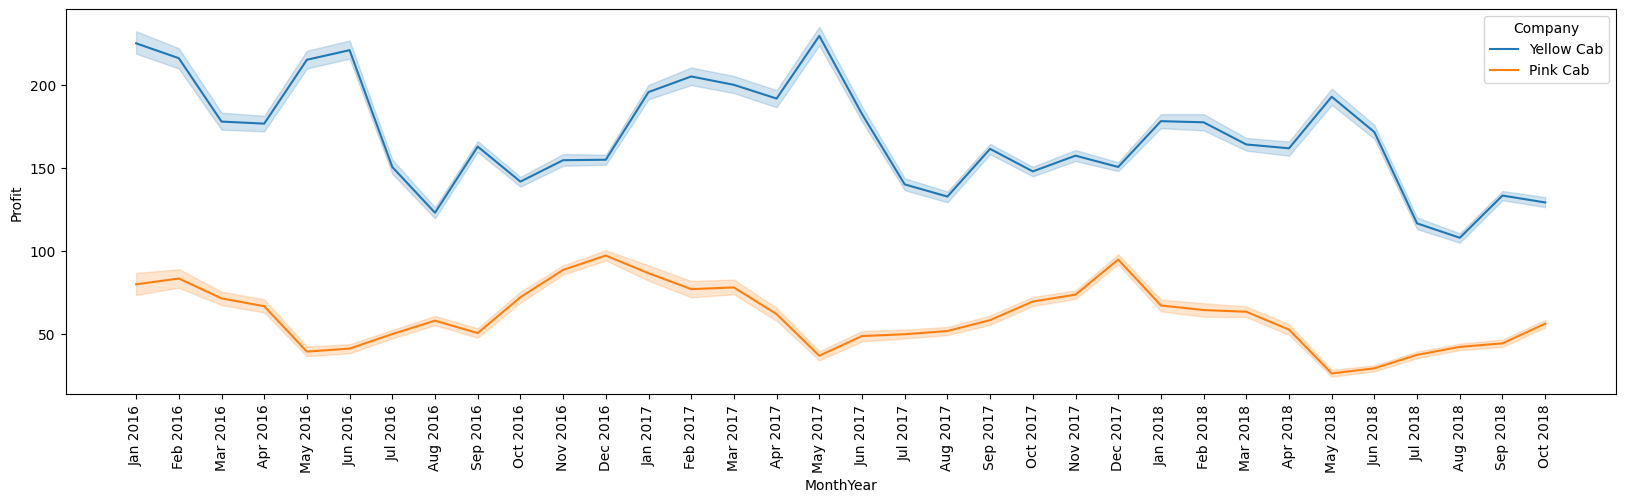

In [172]:
# Line plot for Profit made over by company (MonthYear)

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='MonthYear', y='Profit', hue='Company', data=df)

<Axes: xlabel='Year', ylabel='KM Travelled'>

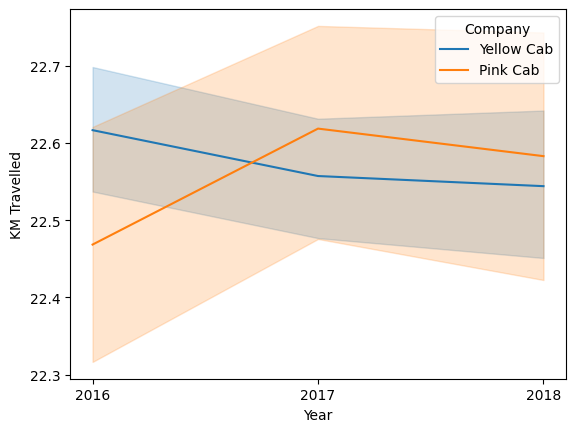

In [173]:
# Line plot for distance travelled by year
sns.lineplot(x='Year', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Year', ylabel='Profit'>

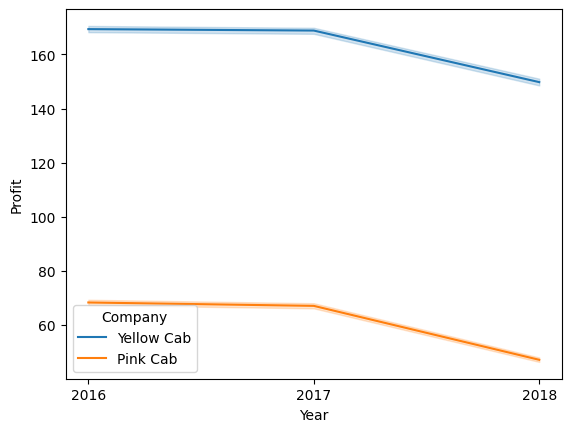

In [174]:
# Line plot for profit by year
sns.lineplot(x='Year', y='Profit', hue='Company', data=df)

<Axes: xlabel='Month', ylabel='KM Travelled'>

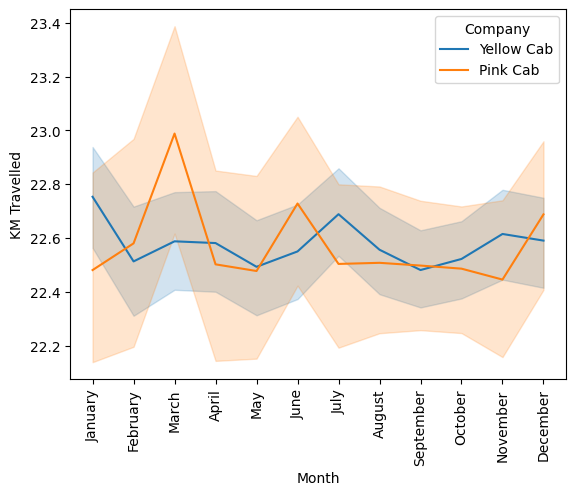

In [175]:
# Line plot for distance travelled by month
plt.xticks(rotation=90)
sns.lineplot(x='Month', y='KM Travelled', hue='Company', data=df)


<Axes: xlabel='Month', ylabel='Profit'>

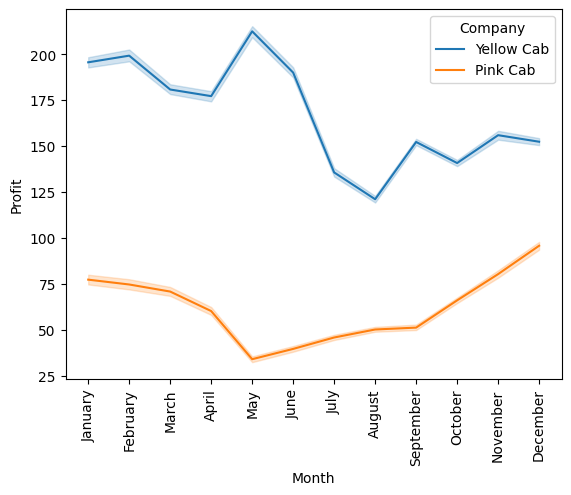

In [176]:
# Line plot for profit by month
plt.xticks(rotation=90)
sns.lineplot(x='Month', y='Profit', hue='Company', data=df)

<Axes: xlabel='Day_of_Week', ylabel='KM Travelled'>

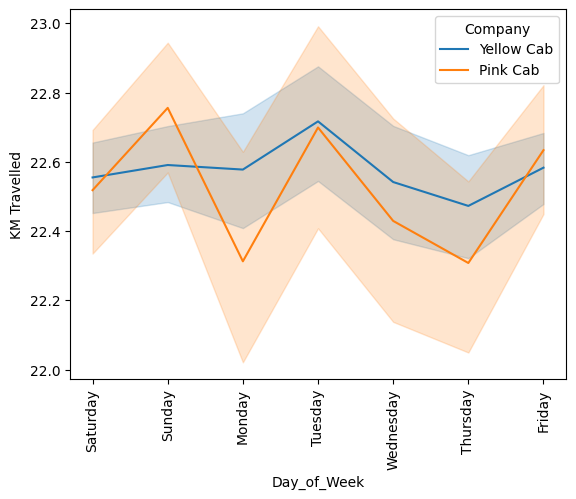

In [177]:
# Line plot for distance travelled by day of the week
plt.xticks(rotation=90)
sns.lineplot(x='Day_of_Week', y='KM Travelled', hue='Company', data=df)

<Axes: xlabel='Day_of_Week', ylabel='Profit'>

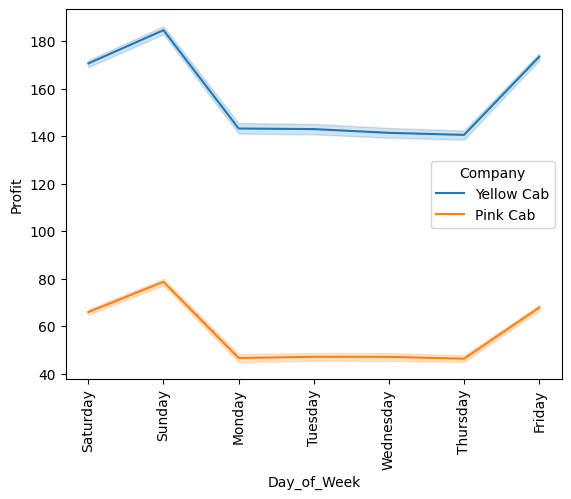

In [178]:
# Line plot for profit made by day of the week
plt.xticks(rotation=90)
sns.lineplot(x='Day_of_Week', y='Profit', hue='Company', data=df)

## Price Charged on each trip and profit made

In [191]:
from pickle import dump, load
import sys

# Define the function
def calculate_price_and_profit(distance, company):
    if company == 'Pink Cab':
        price_per_km = pink_price_per_KM
        cost_per_km = pink_cost_per_KM
    elif company == 'Yellow Cab':
        price_per_km = yellow_price_per_KM
        cost_per_km = yellow_cost_per_KM

    revenue = round(distance * price_per_km, 2)
    cost_of_trip = round(distance * cost_per_km, 2)
    profit = round(revenue - cost_of_trip, 2)

    return revenue, profit

# Define a function for the interactive part
def ask_user():
    while True:
        # Prompt user for input and capitalize each word in company
        distance_input = input("Enter the distance of the trip in kilometers: ")
        try:
            distance = round(float(distance_input), 2)
        except ValueError:
            print("Invalid distance format. Please enter a valid number.")
            continue

        while True:
            company_input = input("Enter the company ('P' for Pink Cab or 'Y' for Yellow Cab): ").lower()

            # Check if the input company is valid
            if company_input == 'p':
                company = 'Pink Cab'
                break
            elif company_input == 'y':
                company = 'Yellow Cab'
                break
            else:
                print("Invalid company input. Please enter 'P' for Pink Cab or 'Y' for Yellow Cab.")

        # Calculate and display the trip price and profit with 2 decimal places
        revenue, profit = calculate_price_and_profit(distance, company)
        print(f"The price of the trip with {company} for a distance of {distance:.2f} km is: ${revenue:.2f}")

        # Print the profit for the trip
        if profit is not None:
            print(f"The profit for the trip is: ${profit:.2f}")

        # Ask if the user wants to calculate another trip
        another_trip = input("Do you want to calculate the price for another trip? (y/n): ").lower()
        if another_trip == 'n':
            break
        elif another_trip != 'y':
            print("Invalid response. Please enter 'y' for yes or 'n' for no.")
# ask_user()


Enter the distance of the trip in kilometers: 6
Enter the company ('P' for Pink Cab or 'Y' for Yellow Cab): y
The price of the trip with Yellow Cab for a distance of 6.00 km is: $122.78
The profit for the trip is: $43.58
Do you want to calculate the price for another trip? (y/n): n


## Dump to pickle file for deploymenty


In [192]:
from pickle import dump, load
import sys

# Save the functions to a pickle file
with open('ask_user.pkl', 'wb') as file:
    dump((calculate_price_and_profit, ask_user), file)

## Forecasting Future Profit

In [180]:
# Preparing Data for Forcasting using Sklearn

pink_cab = df[df['Company'] == 'Pink Cab'][['Date of Travel','City', 'KM Travelled', 'Price Charged','Cost of Trip', 'Profit']]

yellow_cab = df[df['Company'] == 'Yellow Cab'][['Date of Travel','City', 'KM Travelled', 'Price Charged','Cost of Trip', 'Profit']]




## Forecasting One Year (365 days) Profit for Pink Cab



In [ ]:
# Extract day of the week and month from the 'Date of Travel' column
pink_cab['Date of Travel'] = pd.to_datetime(pink_cab['Date of Travel'])
pink_cab['DayOfWeek'] = pink_cab['Date of Travel'].dt.dayofweek
pink_cab['Month'] = pink_cab['Date of Travel'].dt.month

# Encode city names using LabelEncoder with a new category for unknown cities
label_encoder = LabelEncoder()
pink_cab['City_Code'] = label_encoder.fit_transform(pink_cab['City'])

# Define features and target variable
features = ['City_Code', 'KM Travelled', 'Price Charged', 'DayOfWeek', 'Month']
target = 'Profit'


# Define features and target variable
features = ['City_Code', 'KM Travelled', 'Price Charged', 'DayOfWeek', 'Month']
target = 'Profit'

# Create a linear regression model
model = LinearRegression()

# Split the dataset into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(pink_cab, test_size=0.2, random_state=42)

# Train the model on the training dataset
model.fit(train_df[features], train_df[target])

# Evaluate on the test set
test_predictions = model.predict(test_df[features])

# Calculate Mean Absolute Error on the test set
mae_test = mean_absolute_error(test_df[target], test_predictions)
print(f'Mean Absolute Error (Test): {mae_test}')

# Calculate Root Mean Squared Error on the test set
rmse_test = np.sqrt(mean_squared_error(test_df[target], test_predictions))
print(f'Root Mean Squared Error (Test): {rmse_test}')

# Create a DataFrame to store the forecasted data
forecast_data = pd.DataFrame()

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['City', 'MAE', 'RMSE'])

# Loop through each city
for city_code in pink_cab['City_Code'].unique():
    city = label_encoder.inverse_transform([city_code])[0]

    # Filter data for the current city in the test set
    city_data_test = test_df[test_df['City_Code'] == city_code][['Date of Travel', 'KM Travelled', 'Price Charged', 'DayOfWeek', 'Month', 'Profit']]

    # Check if there is enough data for forecasting
    if len(city_data_test) < 1:
        print(f"Skipping {city} due to insufficient data for forecasting in the test set.")
        continue

    # Assuming 'City_Code', 'KM Travelled', 'Price Charged', 'DayOfWeek', and 'Month' remain constant for forecasting
    forecast_data_city = pd.DataFrame({
        'Date of Travel': pd.date_range(start=max(city_data_test['Date of Travel']) + pd.DateOffset(days=1), periods=365, freq='D'),
        'City_Code': [city_code] * 365,
        'KM Travelled': [city_data_test['KM Travelled'].mean()] * 365,
        'Price Charged': [city_data_test['Price Charged'].mean()] * 365,
        'DayOfWeek': [i % 7 for i in range(365)],
        'Month': [1] * 365
    })

    # Predict profit using the trained model
    forecast_data_city['Profit'] = model.predict(forecast_data_city[features])

    # Append city-specific forecast to the overall forecast_data
    forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)



Mean Absolute Error (Test): 11.916888320796357
Root Mean Squared Error (Test): 15.66048054341127


<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)
<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)
<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)
<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)
<ipython

     Date of Travel          City  Profit  KM Travelled     Month  DayOfWeek
0        2018-10-30    CHICAGO IL   34.19         21.97   October    Tuesday
1        2018-10-31    CHICAGO IL   34.24         21.97   October  Wednesday
2        2018-11-01    CHICAGO IL   34.29         21.97  November   Thursday
3        2018-11-02    CHICAGO IL   34.35         21.97  November     Friday
4        2018-11-03    CHICAGO IL   34.40         21.97  November   Saturday
...             ...           ...     ...           ...       ...        ...
6930     2019-10-23  NASHVILLE TN   31.49         21.77   October  Wednesday
6931     2019-10-24  NASHVILLE TN   31.55         21.77   October   Thursday
6932     2019-10-25  NASHVILLE TN   31.60         21.77   October     Friday
6933     2019-10-26  NASHVILLE TN   31.65         21.77   October   Saturday
6934     2019-10-27  NASHVILLE TN   31.33         21.77   October     Sunday

[6935 rows x 6 columns]


<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)
<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)
<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)
<ipython-input-110-5856d1d2b6a0>:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data = forecast_data.append(forecast_data_city, ignore_index=True)


## Pink Cab Actual Profit vs Predicted Profit

In [ ]:
# Create a DataFrame for Date of Travel, true values, and predicted values
pink_df = pd.DataFrame({
    'Date of Travel': test_df['Date of Travel'],
    'True Profit': test_df[target].values,
    'Predicted Profit': test_predictions
})

# Display the true and predicted values
print(pink_df)


       Date of Travel  True Profit  Predicted Profit
54443      2017-05-28        73.71             73.98
151778     2018-07-13       115.54            145.43
281474     2018-05-11        22.40             17.93
195368     2017-09-04        20.78             39.43
213286     2017-04-18         9.24              7.87
...               ...          ...               ...
208497     2018-07-11        37.81             42.60
261787     2017-11-17       204.55            194.73
70000      2016-09-08        46.92             49.70
233674     2017-05-28         5.08              8.49
273870     2016-11-22         2.50             -3.21

[15251 rows x 3 columns]


<Axes: xlabel='Date of Travel', ylabel='True Profit'>

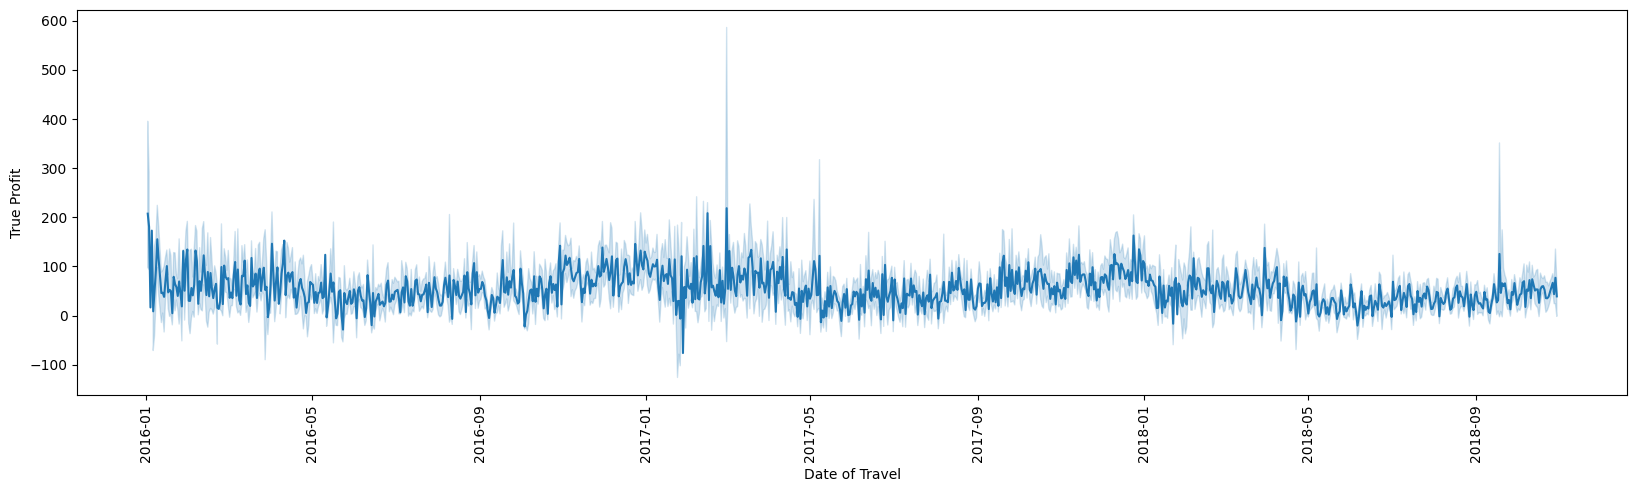

In [ ]:
# Line plot of true profit

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='Date of Travel', y='True Profit', data=pink_df)

<Axes: xlabel='Date of Travel', ylabel='Predicted Profit'>

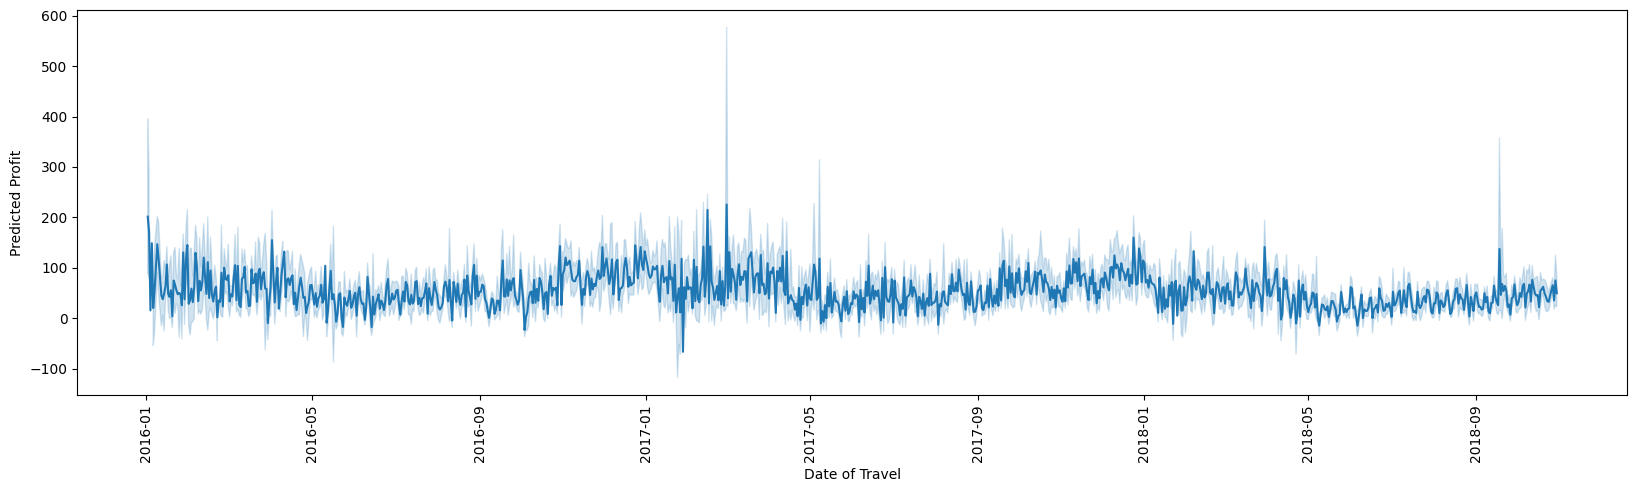

In [ ]:
# Line plot of predicted profit

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='Date of Travel', y='Predicted Profit', data=pink_df)


## Forecast for One Year (365 days) Profit for Pink Cab

In [ ]:
# List of all cities
cities = ['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO',
          'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY',
          'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA',
          'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']

# Create a dictionary to map city names to encoded city codes
city_mapping = dict(enumerate(cities))

# Decode city names in the forecasted data
forecast_data['City'] = forecast_data['City_Code'].map(city_mapping)

# Extract month and day of the week in words
forecast_data['Month'] = forecast_data['Date of Travel'].dt.month_name()
forecast_data['DayOfWeek'] = forecast_data['Date of Travel'].dt.day_name()

# Display the forecasted data
print(forecast_data[['Date of Travel', 'City', 'Profit', 'KM Travelled', 'Month', 'DayOfWeek']])

     Date of Travel          City  Profit  KM Travelled     Month  DayOfWeek
0        2018-10-30    CHICAGO IL   34.19         21.97   October    Tuesday
1        2018-10-31    CHICAGO IL   34.24         21.97   October  Wednesday
2        2018-11-01    CHICAGO IL   34.29         21.97  November   Thursday
3        2018-11-02    CHICAGO IL   34.35         21.97  November     Friday
4        2018-11-03    CHICAGO IL   34.40         21.97  November   Saturday
...             ...           ...     ...           ...       ...        ...
6930     2019-10-23  NASHVILLE TN   31.49         21.77   October  Wednesday
6931     2019-10-24  NASHVILLE TN   31.55         21.77   October   Thursday
6932     2019-10-25  NASHVILLE TN   31.60         21.77   October     Friday
6933     2019-10-26  NASHVILLE TN   31.65         21.77   October   Saturday
6934     2019-10-27  NASHVILLE TN   31.33         21.77   October     Sunday

[6935 rows x 6 columns]


<Axes: xlabel='Date of Travel', ylabel='Profit'>

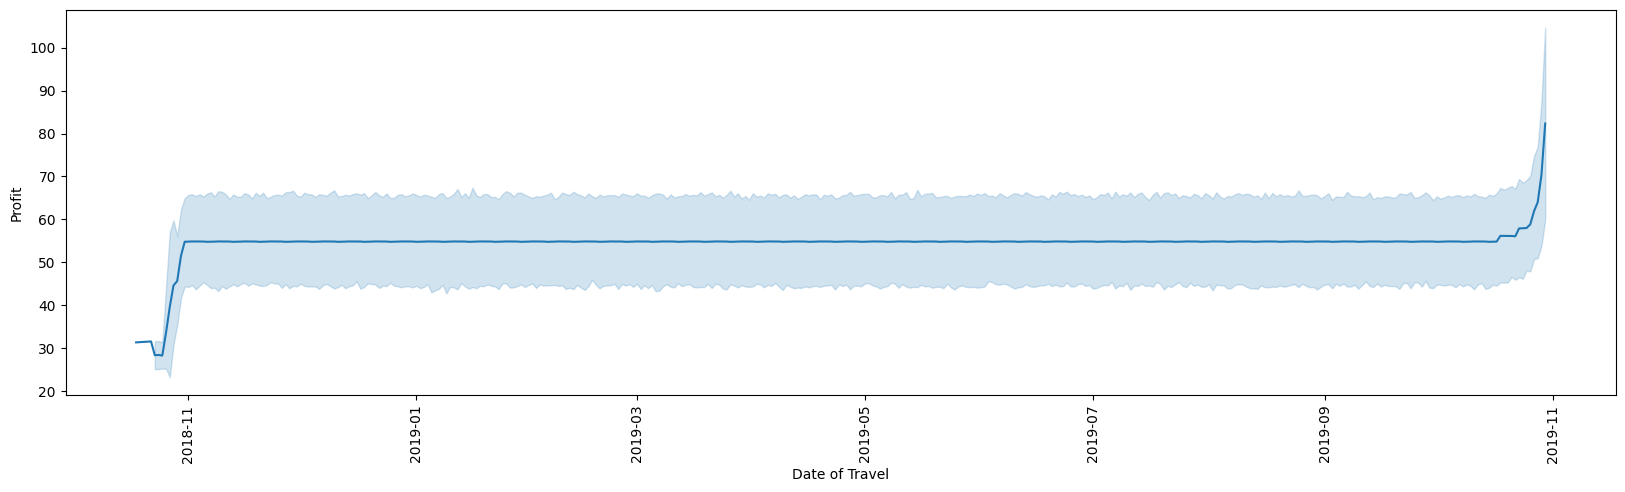

In [ ]:
# Line plot for forecasted profit

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='Date of Travel', y='Profit', data=forecast_data)


## Forecasting for One Year (365 days) Profit for Yellow Cab

In [ ]:
# Extract day of the week and month from the 'Date of Travel' column
yellow_cab['Date of Travel'] = pd.to_datetime(yellow_cab['Date of Travel'])
yellow_cab['DayOfWeek'] = yellow_cab['Date of Travel'].dt.dayofweek
yellow_cab['Month'] = yellow_cab['Date of Travel'].dt.month

# Encode city names using LabelEncoder with a new category for unknown cities
label_encoder_yellow = LabelEncoder()
yellow_cab['City_Code'] = label_encoder_yellow.fit_transform(yellow_cab['City'])

# Define features and target variable
features_yellow = ['City_Code', 'KM Travelled', 'Price Charged', 'DayOfWeek', 'Month']
target_yellow = 'Profit'

# Create a linear regression model
model_yellow = LinearRegression()

# Split the dataset into training and testing sets (80% train, 20% test)
train_df_yellow, test_df_yellow = train_test_split(yellow_cab, test_size=0.2, random_state=42)

# Train the model on the training dataset
model_yellow.fit(train_df_yellow[features_yellow], train_df_yellow[target_yellow])

# Evaluate on the test set
test_predictions_yellow = model_yellow.predict(test_df_yellow[features_yellow])

# Calculate Mean Absolute Error on the test set
mae_test_yellow = mean_absolute_error(test_df_yellow[target_yellow], test_predictions_yellow)
print(f'Mean Absolute Error (Test): {mae_test_yellow}')

# Calculate Root Mean Squared Error on the test set
rmse_test_yellow = np.sqrt(mean_squared_error(test_df_yellow[target_yellow], test_predictions_yellow))
print(f'Root Mean Squared Error (Test): {rmse_test_yellow}')

# Create a DataFrame to store the forecasted data
forecast_data_yellow = pd.DataFrame()

# Create a DataFrame to store the results
result_df_yellow = pd.DataFrame(columns=['City', 'MAE', 'RMSE'])

# Loop through each city
for city_code_yellow in yellow_cab['City_Code'].unique():
    city_yellow = label_encoder_yellow.inverse_transform([city_code_yellow])[0]

    # Filter data for the current city in the test set
    city_data_test_yellow = test_df_yellow[test_df_yellow['City_Code'] == city_code_yellow][['Date of Travel', 'KM Travelled', 'Price Charged', 'DayOfWeek', 'Month', 'Profit']]

    # Check if there is enough data for forecasting
    if len(city_data_test_yellow) < 1:
        print(f"Skipping {city_yellow} due to insufficient data for forecasting in the test set.")
        continue

    # Assuming 'City_Code', 'KM Travelled', 'Price Charged', 'DayOfWeek', and 'Month' remain constant for forecasting
    forecast_data_city_yellow = pd.DataFrame({
        'Date of Travel': pd.date_range(start=max(city_data_test_yellow['Date of Travel']) + pd.DateOffset(days=1), periods=365, freq='D'),
        'City_Code': [city_code_yellow] * 365,
        'KM Travelled': [city_data_test_yellow['KM Travelled'].mean()] * 365,
        'Price Charged': [city_data_test_yellow['Price Charged'].mean()] * 365,
        'DayOfWeek': [i % 7 for i in range(365)],
        'Month': [1] * 365
    })

    # Predict profit using the trained model
    forecast_data_city_yellow['Profit'] = model_yellow.predict(forecast_data_city_yellow[features_yellow])

    # Append city-specific forecast to the overall forecast_data
    forecast_data_yellow = forecast_data_yellow.append(forecast_data_city_yellow, ignore_index=True)


Mean Absolute Error (Test): 14.17029883320108
Root Mean Squared Error (Test): 18.628727155270823


<ipython-input-120-08151e3acf02>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data_yellow = forecast_data_yellow.append(forecast_data_city_yellow, ignore_index=True)
<ipython-input-120-08151e3acf02>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data_yellow = forecast_data_yellow.append(forecast_data_city_yellow, ignore_index=True)
<ipython-input-120-08151e3acf02>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data_yellow = forecast_data_yellow.append(forecast_data_city_yellow, ignore_index=True)
<ipython-input-120-08151e3acf02>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_data_yellow 

## Yellow Cab Actual Profit vs Predicted Profit

In [ ]:
# Create a DataFrame for Date of Travel, true values, and predicted values
yellow_df = pd.DataFrame({
    'Date of Travel': test_df['Date of Travel'],
    'True Profit': test_df[target].values,
    'Predicted Profit': test_predictions
})

# Display the true and predicted values
print(yellow_df)


       Date of Travel  True Profit  Predicted Profit
54443      2017-05-28        73.71             73.98
151778     2018-07-13       115.54            145.43
281474     2018-05-11        22.40             17.93
195368     2017-09-04        20.78             39.43
213286     2017-04-18         9.24              7.87
...               ...          ...               ...
208497     2018-07-11        37.81             42.60
261787     2017-11-17       204.55            194.73
70000      2016-09-08        46.92             49.70
233674     2017-05-28         5.08              8.49
273870     2016-11-22         2.50             -3.21

[15251 rows x 3 columns]



## Forecast for One Year (365 days) Profit for Yellow Cab

<Axes: xlabel='Date of Travel', ylabel='True Profit'>

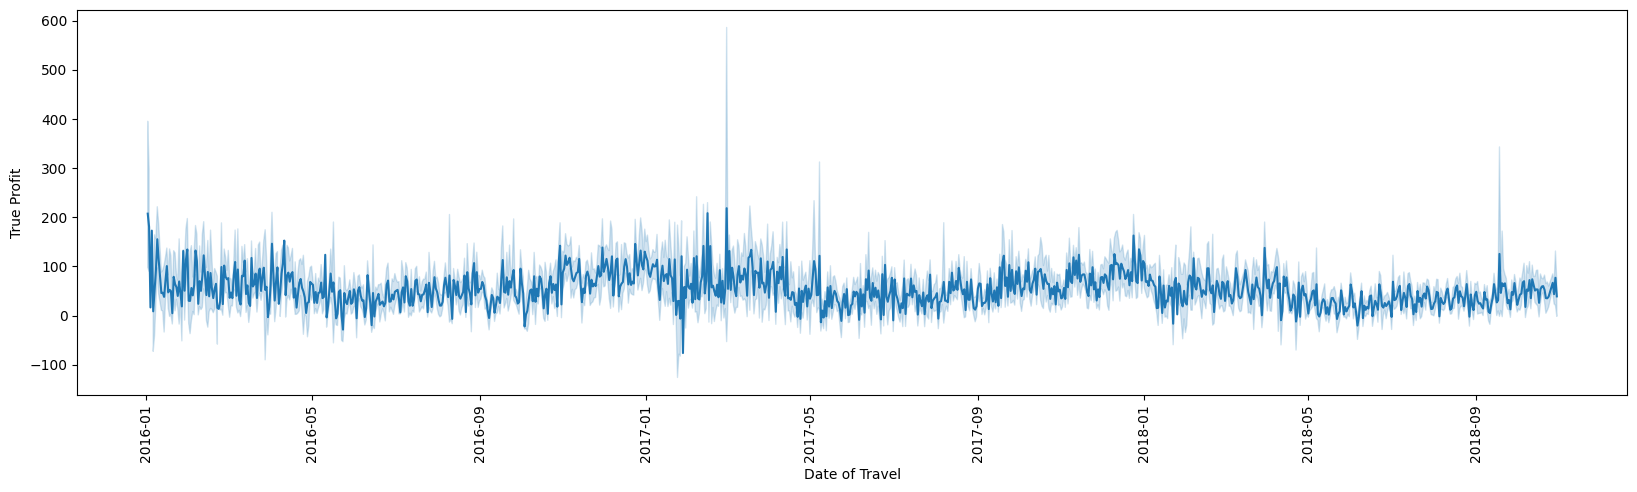

In [ ]:
# Line plot of true profit

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='Date of Travel', y='True Profit', data=yellow_df)

<Axes: xlabel='Date of Travel', ylabel='Predicted Profit'>

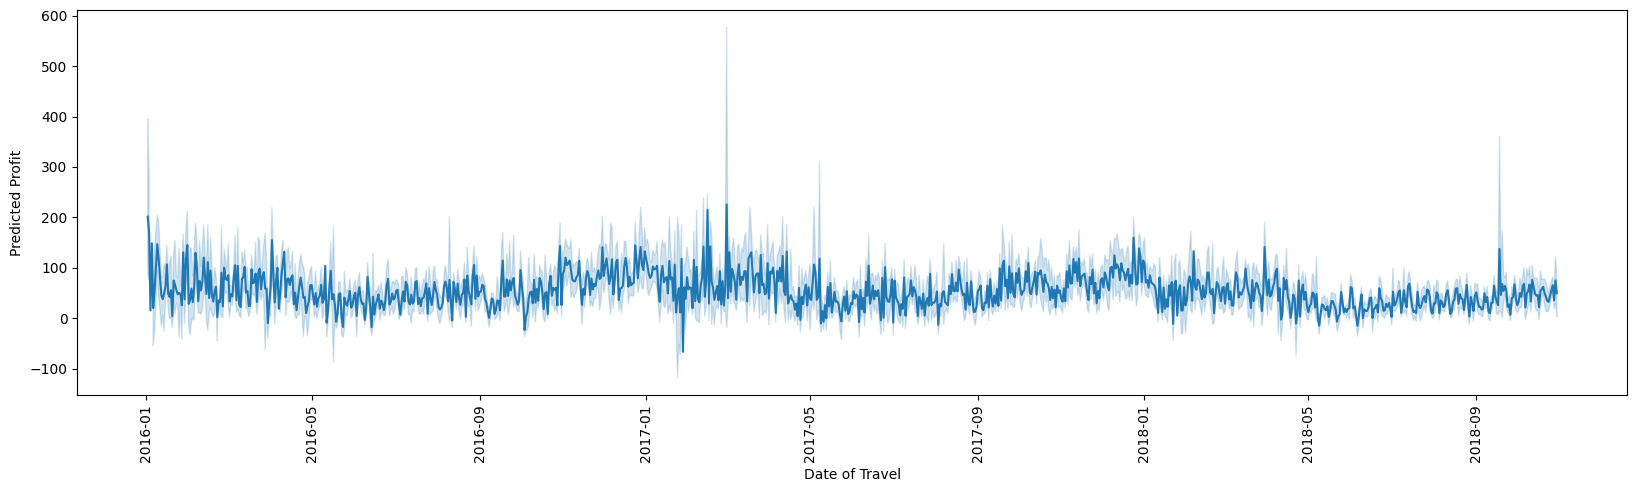

In [ ]:
# Line plot of predicted profit

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='Date of Travel', y='Predicted Profit', data=yellow_df)

In [ ]:
# List of all cities
cities = ['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX', 'DENVER CO',
          'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY',
          'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA',
          'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']

# Create a dictionary to map city names to encoded city codes
city_mapping = dict(enumerate(cities))

# Decode city names in the forecasted data
forecast_data['City'] = forecast_data['City_Code'].map(city_mapping)

# Extract month and day of the week in words
forecast_data['Month'] = forecast_data['Date of Travel'].dt.month_name()
forecast_data['DayOfWeek'] = forecast_data['Date of Travel'].dt.day_name()

# Display the forecasted data
print(forecast_data[['Date of Travel', 'City', 'Profit', 'KM Travelled', 'Month', 'DayOfWeek']])

     Date of Travel          City  Profit  KM Travelled     Month  DayOfWeek
0        2018-10-30    CHICAGO IL   34.19         21.97   October    Tuesday
1        2018-10-31    CHICAGO IL   34.24         21.97   October  Wednesday
2        2018-11-01    CHICAGO IL   34.29         21.97  November   Thursday
3        2018-11-02    CHICAGO IL   34.35         21.97  November     Friday
4        2018-11-03    CHICAGO IL   34.40         21.97  November   Saturday
...             ...           ...     ...           ...       ...        ...
6930     2019-10-23  NASHVILLE TN   31.49         21.77   October  Wednesday
6931     2019-10-24  NASHVILLE TN   31.55         21.77   October   Thursday
6932     2019-10-25  NASHVILLE TN   31.60         21.77   October     Friday
6933     2019-10-26  NASHVILLE TN   31.65         21.77   October   Saturday
6934     2019-10-27  NASHVILLE TN   31.33         21.77   October     Sunday

[6935 rows x 6 columns]


<Axes: xlabel='Date of Travel', ylabel='Profit'>

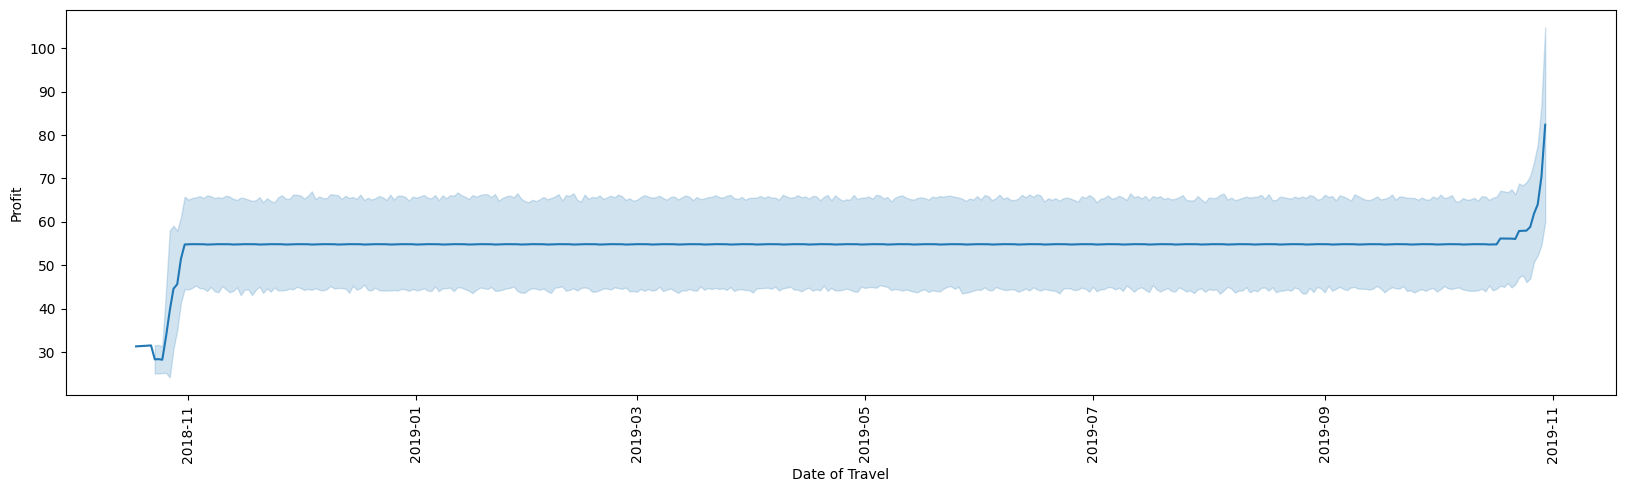

In [ ]:
# Line plot for forecasted profit

# Rotate x-axis labels
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.lineplot(x='Date of Travel', y='Profit', data=forecast_data)